In [299]:
import pandas as pd
import numpy as np


In [300]:
df=pd.read_csv("CBB_Listings - Copy.csv")

In [301]:
df.dtypes

,0
mileage,int64
price,int64
model_year,int64
make,object
model,object
series,object
style,object
certified,int64
price_analysis,int64
drivetrain_from_vin,object


In [302]:
df_copy=df.copy()

In [303]:
df_copy['transmission_from_vin'].value_counts()


,count
transmission_from_vin,
A,141105
M,3975
7,32
6,2


In [304]:
df_copy['transmission_from_vin'] = df_copy['transmission_from_vin'].replace({'7': 'A', '6': 'M'})
print(df_copy['transmission_from_vin'].unique())

['A' 'M']


In [305]:
# Ensure the column is treated as a string, then extract only numeric engine displacement
df_copy['engine_from_vin'] = df_copy['engine_from_vin'].astype(str).str.extract(r'(\d+\.\d+)')

# Display the DataFrame
df_copy

,mileage,price,model_year,make,model,series,style,certified,price_analysis,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes
0,230860,11500,1987,Chevrolet,Camaro,Iroc Z28,2D Coupe,0,0,RWD,5.7,A,Gas,0
1,48905,8700,1988,Chrysler,Fifth Avenue,NaN,4D Sedan,0,0,RWD,5.2,A,Gas,0
2,174640,6000,1989,Cadillac,DeVille,NaN,4D Sedan,0,0,FWD,4.5,A,Gas,0
3,174640,6000,1989,Cadillac,DeVille,NaN,4D Sedan,0,0,FWD,4.5,A,Gas,4
4,288000,8500,1989,Chevrolet,Camaro,Z28,2D Coupe,0,0,RWD,5.7,A,Gas,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145109,30,105781,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,0,AWD,2.0,A,PHEV,25
145110,30,105990,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,0,AWD,2.0,A,PHEV,22
145111,2454,108201,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,0,AWD,2.0,A,PHEV,2
145112,2454,108201,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,0,AWD,2.0,A,PHEV,10


In [306]:
# Check for missing values in different forms
# Define special_missing_values first!
special_missing_values = ['N/A', '?', '-']  # Replace with your actual special missing values

missing_summary = pd.DataFrame({
    "NaN Count": df_copy.isnull().sum(),
    "Zero Count": (df_copy == 0).sum(),
    "Empty String Count": (df_copy == "").sum(),
    "Special Missing Count": df_copy.isin(special_missing_values).sum()
})

# Display the missing value summary
print(missing_summary)

                       NaN Count  Zero Count  Empty String Count  \
mileage                        0       10175                   0   
price                          0        4340                   0   
model_year                     0           0                   0   
make                           0           0                   0   
model                          0           0                   0   
series                       825           0                   0   
style                          0           0                   0   
certified                      0      144156                   0   
price_analysis                 0      133080                   0   
drivetrain_from_vin            0           0                   0   
engine_from_vin             3484           0                   0   
transmission_from_vin          0           0                   0   
fuel_type_from_vin             0           0                   0   
number_price_changes           0       59921    

In [307]:
# Define special missing values
missing_values = ["", 0, "N/A", "?", "-", "NaN", "None", "--", "unknown", "Unknown"]

# Replace all missing values with NaN
df_copy.replace(missing_values, pd.NA, inplace=True)

# Check missing values
df_copy.isnull().sum() # Shows total missing values per column

,0
mileage,10175
price,4340
model_year,0
make,0
model,0
series,825
style,0
certified,144156
price_analysis,133080
drivetrain_from_vin,0


In [308]:
df_copy['mileage'] = df_copy.groupby(['make', 'model'])['mileage'].transform(lambda x: x.fillna(x.median()))
df_copy['mileage'].fillna(df_copy['mileage'].median(), inplace=True)  # Fallback in case grouping fails

<ipython-input-308-cf9202931830>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['mileage'] = df_copy.groupby(['make', 'model'])['mileage'].transform(lambda x: x.fillna(x.median()))
<ipython-input-308-cf9202931830>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['mileage'] = df_copy.groupby(['make', 'model'])['mileage'].transform(lambda x: x.fillna(x.median()))
<ipython-input-308-cf9202931830>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer

In [309]:
df_copy['price'] = df_copy.groupby(['make', 'model'])['price'].transform(lambda x: x.fillna(x.median()))
df_copy['price'].fillna(df_copy['price'].median(), inplace=True)  # Fallback for remaining NaNs

<ipython-input-309-d7cc091d1151>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['price'] = df_copy.groupby(['make', 'model'])['price'].transform(lambda x: x.fillna(x.median()))
<ipython-input-309-d7cc091d1151>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['price'] = df_copy.groupby(['make', 'model'])['price'].transform(lambda x: x.fillna(x.median()))
<ipython-input-309-d7cc091d1151>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects

In [310]:
# Fill missing 'series' values using grouped mode first
df_copy['series'] = df_copy.groupby(['make', 'model'])['series'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else pd.NA))

# If some values are still NaN, fill them with the overall most frequent series (global mode)
df_copy['series'].fillna(df_copy['series'].mode()[0], inplace=True)


<ipython-input-310-9f3e34c51454>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['series'].fillna(df_copy['series'].mode()[0], inplace=True)


In [311]:
# Fill missing 'engine_from_vin' using grouped mode (by model_year & make)
df_copy['engine_from_vin'] = df_copy.groupby(['model_year', 'make'])['engine_from_vin'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else pd.NA)
)

# Fill remaining missing values with the most frequent engine type globally
df_copy['engine_from_vin'].fillna(df_copy['engine_from_vin'].mode()[0], inplace=True)

<ipython-input-311-719b2db4b99f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['engine_from_vin'].fillna(df_copy['engine_from_vin'].mode()[0], inplace=True)


In [312]:
df_copy.isnull().sum()

,0
mileage,0
price,0
model_year,0
make,0
model,0
series,0
style,0
certified,144156
price_analysis,133080
drivetrain_from_vin,0


In [313]:
df_copy['certified'].value_counts()

,count
certified,
1,958


In [315]:
# Replace NaN values with 0 (Not Certified)
df_copy['certified'].fillna(0, inplace=True)

# Ensure the column is numeric
df_copy['certified'] = df_copy['certified'].astype(int)

# Verify the result
print(f"Missing values in 'certified': {df_copy['certified'].isnull().sum()}")
print("Updated value counts in 'certified':")
print(df_copy['certified'].value_counts())


Missing values in 'certified': 0
Updated value counts in 'certified':
certified
0    144156
1       958
Name: count, dtype: int64


<ipython-input-315-c8aaeb22f80f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['certified'].fillna(0, inplace=True)
<ipython-input-315-c8aaeb22f80f>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['certified'].fillna(0, inplace=True)


In [316]:
# Display unique values in the 'certified' column
print("Unique values in 'certified':", df_copy['certified'].unique())



Unique values in 'certified': [0 1]


In [317]:
df_copy['certified'].value_counts()

,count
certified,
0,144156
1,958


In [318]:
df_copy.isnull().sum()

,0
mileage,0
price,0
model_year,0
make,0
model,0
series,0
style,0
certified,0
price_analysis,133080
drivetrain_from_vin,0


In [319]:
# Replace missing values in 'number_price_changes' with the median
df_copy['number_price_changes'].fillna(df_copy['number_price_changes'].median(), inplace=True)


<ipython-input-319-a3e1057585f4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['number_price_changes'].fillna(df_copy['number_price_changes'].median(), inplace=True)
<ipython-input-319-a3e1057585f4>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['number_price_changes'].fillna(df_copy['numbe

In [320]:
# Replace missing values in 'price_analysis' with the mode (most frequent value)
df_copy['price_analysis'].fillna(df_copy['price_analysis'].mode()[0], inplace=True)


<ipython-input-320-ecc59ee81a29>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['price_analysis'].fillna(df_copy['price_analysis'].mode()[0], inplace=True)
<ipython-input-320-ecc59ee81a29>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['price_analysis'].fillna(df_copy['price_analysis'].mode(

In [321]:
df_copy.isnull().sum()

,0
mileage,0
price,0
model_year,0
make,0
model,0
series,0
style,0
certified,0
price_analysis,0
drivetrain_from_vin,0


In [322]:
df_copy.dtypes

,0
mileage,float64
price,float64
model_year,int64
make,object
model,object
series,object
style,object
certified,int64
price_analysis,int64
drivetrain_from_vin,object


In [323]:
df_copy

,mileage,price,model_year,make,model,series,style,certified,price_analysis,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes
0,230860.0,11500.0,1987,Chevrolet,Camaro,Iroc Z28,2D Coupe,0,1,RWD,5.7,A,Gas,3.0
1,48905.0,8700.0,1988,Chrysler,Fifth Avenue,XLT,4D Sedan,0,1,RWD,5.2,A,Gas,3.0
2,174640.0,6000.0,1989,Cadillac,DeVille,Base,4D Sedan,0,1,FWD,4.5,A,Gas,3.0
3,174640.0,6000.0,1989,Cadillac,DeVille,Base,4D Sedan,0,1,FWD,4.5,A,Gas,4.0
4,288000.0,8500.0,1989,Chevrolet,Camaro,Z28,2D Coupe,0,1,RWD,5.7,A,Gas,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145109,30.0,105781.0,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,1,AWD,2.0,A,PHEV,25.0
145110,30.0,105990.0,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,1,AWD,2.0,A,PHEV,22.0
145111,2454.0,108201.0,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,1,AWD,2.0,A,PHEV,2.0
145112,2454.0,108201.0,2024,Volvo,XC90,Recharge Ultimate,4D Utility AWD,0,1,AWD,2.0,A,PHEV,10.0


In [324]:
df_copy['certified'].value_counts()

,count
certified,
0,144156
1,958


In [325]:
# List all columns with 'object' type
object_columns = df_copy.select_dtypes(include='object').columns
print("Object columns:", object_columns)

# Convert each 'object' column to 'category'
for col in object_columns:
    df_copy[col] = df_copy[col].astype(pd.CategoricalDtype())

Object columns: Index(['make', 'model', 'series', 'style', 'drivetrain_from_vin',
       'engine_from_vin', 'transmission_from_vin', 'fuel_type_from_vin'],
      dtype='object')


In [326]:
df_copy.dtypes

,0
mileage,float64
price,float64
model_year,int64
make,category
model,category
series,category
style,category
certified,int64
price_analysis,int64
drivetrain_from_vin,category


In [327]:
engine_from_vin=pd.to_numeric(df_copy['engine_from_vin'], errors='coerce')
df_copy['engine_from_vin']=engine_from_vin

In [328]:
df_copy.dtypes

,0
mileage,float64
price,float64
model_year,int64
make,category
model,category
series,category
style,category
certified,int64
price_analysis,int64
drivetrain_from_vin,category


In [329]:
df_clean_dulpicated_sum = {f"The number of duplicated rows are: {df_copy.duplicated().sum()}"}  # Replace df_clean with df_copy
print(df_clean_dulpicated_sum)

{'The number of duplicated rows are: 27796'}


In [330]:
df_copy.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145109,False
145110,False
145111,False
145112,False


In [331]:
df_copy.shape

(145114, 14)

In [332]:
df_copy.drop_duplicates(inplace=True)

In [333]:
df_copy.shape

(117318, 14)

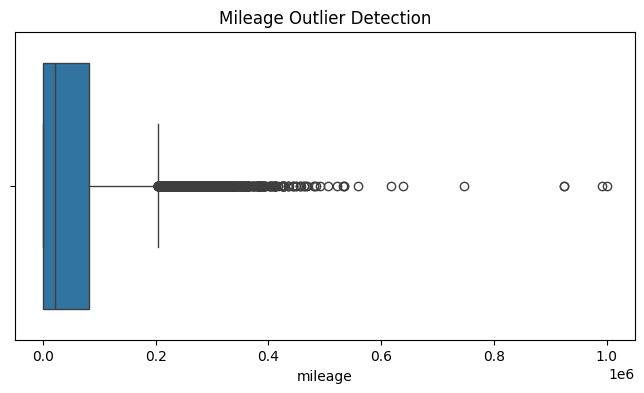

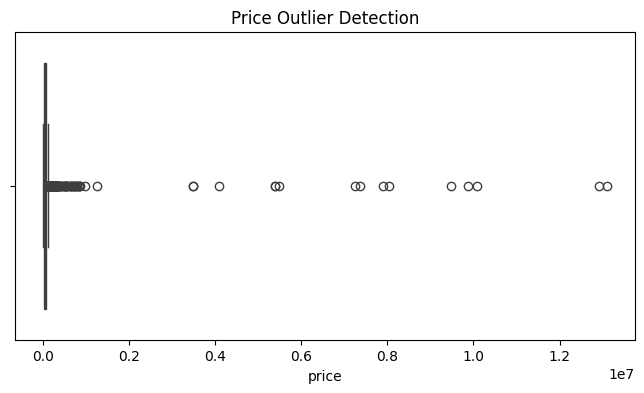

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for mileage
plt.figure(figsize=(8,4))
sns.boxplot(x=df_copy['mileage'])
plt.title("Mileage Outlier Detection")
plt.show()

# Boxplot for price
plt.figure(figsize=(8,4))
sns.boxplot(x=df_copy['price'])
plt.title("Price Outlier Detection")
plt.show()


In [335]:
# Calculate IQR and bounds for mileage
Q1_mileage = df_copy['mileage'].quantile(0.25)
Q3_mileage = df_copy['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

# Calculate IQR and bounds for price
Q1_price = df_copy['price'].quantile(0.25)
Q3_price = df_copy['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Print calculated bounds
print(f"Mileage Bounds: Lower = {lower_bound_mileage}, Upper = {upper_bound_mileage}")
print(f"Price Bounds: Lower = {lower_bound_price}, Upper = {upper_bound_price}")



Mileage Bounds: Lower = -122605.0, Upper = 204395.0
Price Bounds: Lower = -25825.0, Upper = 117687.0


In [336]:
# Replace outliers in mileage with the median
median_mileage = df_copy['mileage'].median()
df_copy['mileage'] = df_copy['mileage'].apply(
    lambda x: median_mileage if x > upper_bound_mileage else x
)



In [337]:
# Replace outliers in price with the median
median_price = df_copy['price'].median()
df_copy['price'] = df_copy['price'].apply(
    lambda x: median_price if x > upper_bound_price else x
)



             mileage          price     model_year      certified  \
count  117318.000000  117318.000000  117318.000000  117318.000000   
mean    42422.809398   46324.498334    2021.273146       0.008064   
std     51756.719552   23824.676184       3.536367       0.089435   
min         1.000000       1.000000    1987.000000       0.000000   
25%        20.000000   27992.000000    2020.000000       0.000000   
50%     20432.000000   42790.000000    2023.000000       0.000000   
75%     76326.500000   61888.000000    2024.000000       0.000000   
max    204379.000000  117649.000000    2024.000000       1.000000   

       price_analysis  engine_from_vin  number_price_changes  
count        117318.0    117318.000000         117318.000000  
mean              1.0         3.911759              4.970746  
std               0.0         7.497301              7.798126  
min               1.0         1.000000              1.000000  
25%               1.0         2.000000              2.000000  


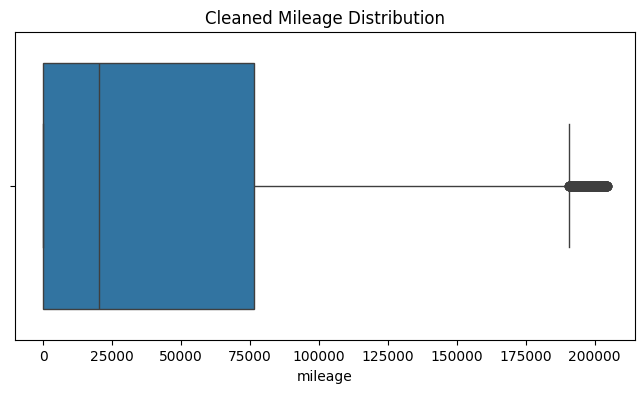

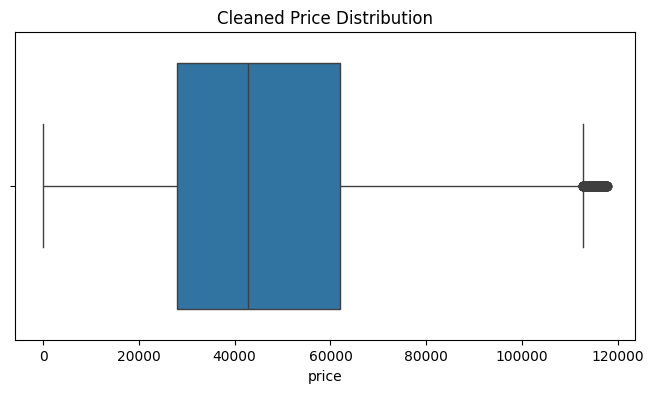

In [338]:
# Print summary statistics after replacement
print(df_copy.describe())

# Plot boxplots again to confirm cleaning
import seaborn as sns
import matplotlib.pyplot as plt

# Mileage boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_copy['mileage'])
plt.title("Cleaned Mileage Distribution")
plt.show()

# Price boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_copy['price'])
plt.title("Cleaned Price Distribution")
plt.show()


In [339]:
# Calculate IQR and bounds for engine_from_vin
Q1_engine = df_copy['engine_from_vin'].quantile(0.25)
Q3_engine = df_copy['engine_from_vin'].quantile(0.75)
IQR_engine = Q3_engine - Q1_engine
lower_bound_engine = Q1_engine - 1.5 * IQR_engine
upper_bound_engine = Q3_engine + 1.5 * IQR_engine

# Print calculated bounds
print(f"Engine Displacement Bounds: Lower = {lower_bound_engine}, Upper = {upper_bound_engine}")



Engine Displacement Bounds: Lower = -0.40000000000000036, Upper = 6.0


In [340]:
# Replace outliers in engine_from_vin with the median
median_engine = df_copy['engine_from_vin'].median()
df_copy['engine_from_vin'] = df_copy['engine_from_vin'].apply(
    lambda x: median_engine if x < lower_bound_engine or x > upper_bound_engine else x
)


count    117318.000000
mean          2.886964
std           1.201395
min           1.000000
25%           2.000000
50%           2.700000
75%           3.500000
max           6.000000
Name: engine_from_vin, dtype: float64


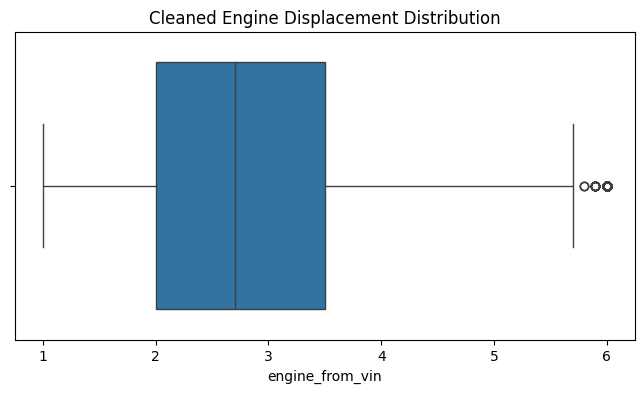

In [341]:
# Print summary statistics
print(df_copy['engine_from_vin'].describe())

# Plot boxplot for engine_from_vin
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_copy['engine_from_vin'])
plt.title("Cleaned Engine Displacement Distribution")
plt.show()


In [342]:
df_copy.shape

(117318, 14)